# Solutions to Exercises in Predictive Modeling

### Exercise: Linear regression with a single predictor variable on the Old Faithful data

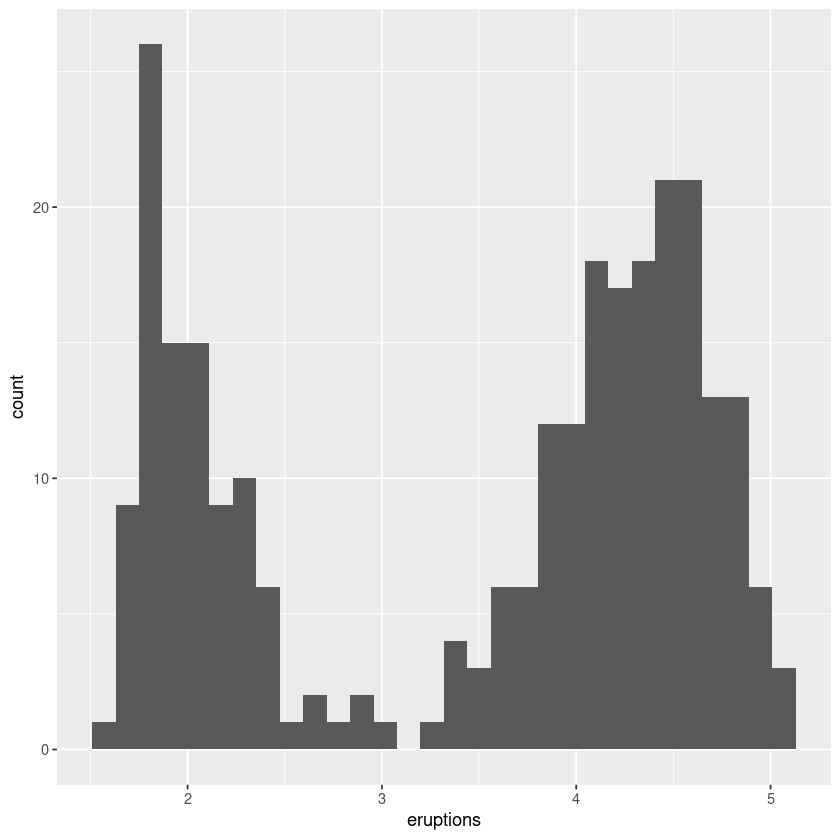

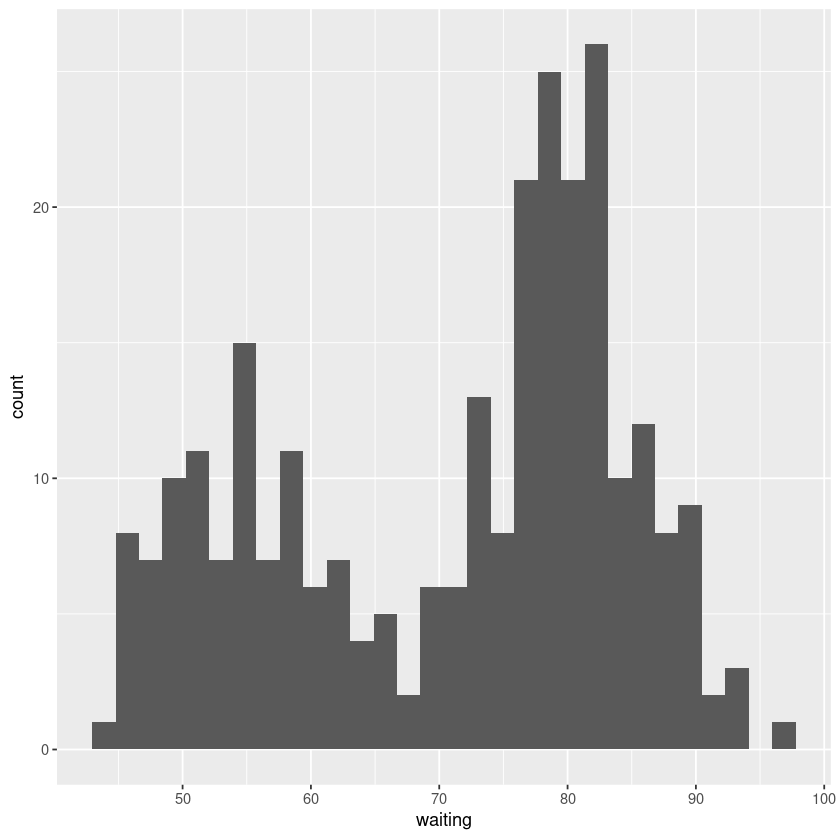

In [1]:
ggplot(faithful) + geom_histogram(aes(x=eruptions), bins=30)
ggplot(faithful) + geom_histogram(aes(x=waiting), bins=30)

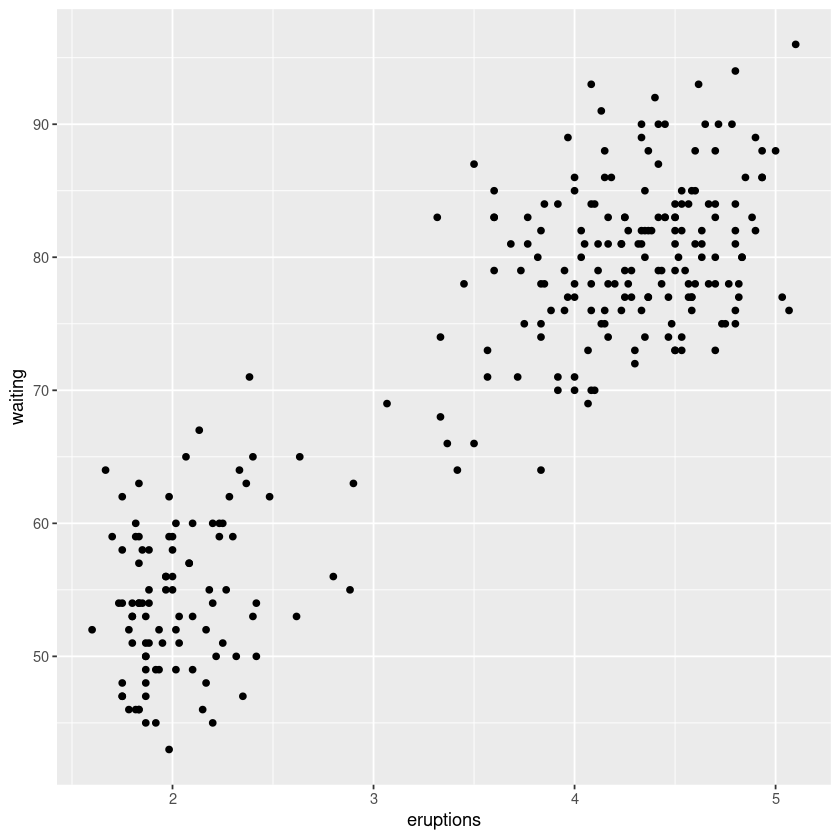

In [2]:
ggplot(faithful) + geom_point(aes(x=eruptions, y=waiting))

It appears that there are two types of eruptions, those of shorter
  duration and those of longer duration. Eruptions of short duration are followed
  by short waiting times until the next eruption. Eruptions of long duration
  are followed by long waiting times.

In [ ]:
fm <- lm(waiting ~ eruptions, data=faithful)
summary(fm)

  The intercept $\beta_0 = 33.47$ represents the average
  waiting time (until the next eruption) just after observing an
  eruption of zero minutes in duration. So, it's not really all that
  meaningful.

  The coefficient on duration $\beta_1 = 10.7$ represents
  the average effect on waiting time for a one--minute increase in
  duration. In other words, for every minute of duration of an eruption,
  you will have to wait an additional 10.7 minutes until the next eruption
  (or long eruptions are followed by long waiting times).

  The predicted waiting time is
  
  $ \beta_0 + \beta_14 = 33.47 + 10.73 \times 4 = 76.4~\text{minutes} $ 
  
  Regarding the uncertainty in the
  prediction, you can either 1) look at the scatter plot right around
  the duration value of 4 minutes and see that the range is about 25
  minutes, or 2) look at the residual standard error from the summary
  of the fitted model. It shows that $\sigma = 5.9$. We know that the
  observations should be within about 3 standard errors of the mean,
  the range would be $\pm 5.9\times 3 = \pm16.8$, or a range of about 32. So a prediction between about 20 and 35 minutes is reasonable. The idea of this exercise is that
  a prediction represents a point estimate and that there is
  uncertainty in that estimate.


### Exercise: Using multiple linear regression to summarize a dataset

In [3]:
fm <- lm(mpg ~ cyl + hp + wt, data = mtcars)
summary(fm)


Call:
lm(formula = mpg ~ cyl + hp + wt, data = mtcars)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.9290 -1.5598 -0.5311  1.1850  5.8986 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 38.75179    1.78686  21.687  < 2e-16 ***
cyl         -0.94162    0.55092  -1.709 0.098480 .  
hp          -0.01804    0.01188  -1.519 0.140015    
wt          -3.16697    0.74058  -4.276 0.000199 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.512 on 28 degrees of freedom
Multiple R-squared:  0.8431,	Adjusted R-squared:  0.8263 
F-statistic: 50.17 on 3 and 28 DF,  p-value: 2.184e-11


The coefficient on weight $\beta_3 \approx -3.17$ means that for every 1000 lb increase in weight, fuel efficiency decreases by approximately 3.17 miles per gallon. The coefficients on the number of cylinders and horsepower are also negative, but the large magnitudes of the $p$-values (.098 and .140, respectively) indicate that their relationship to fuel efficiency is weak at best. 

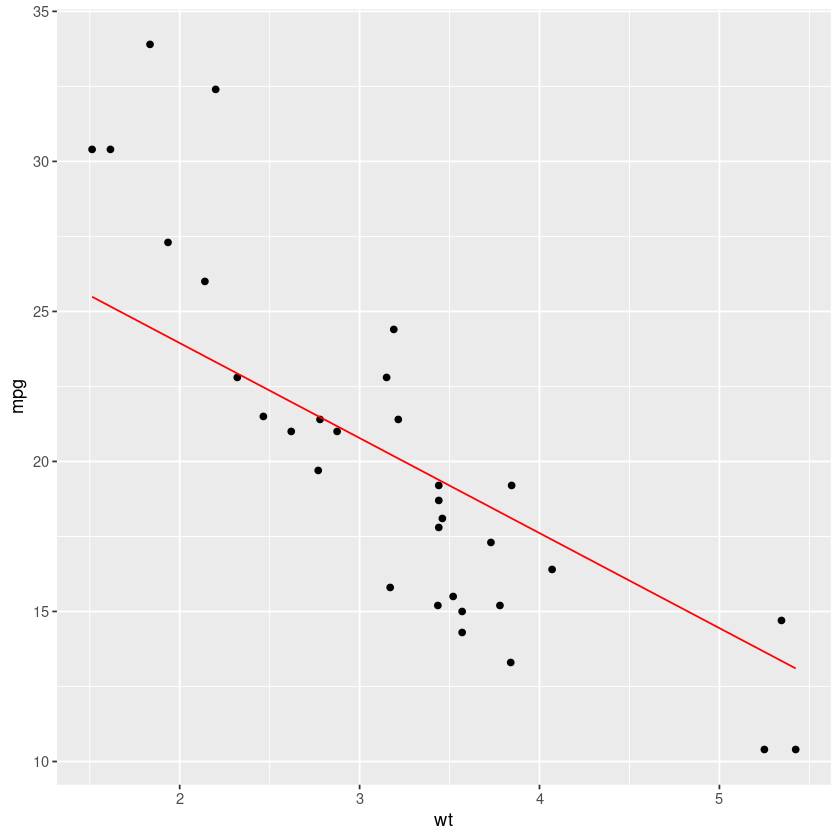

In [4]:
beta0 <- coef(fm)[1] # intercept
beta1 <- coef(fm)[2] # cyl
beta2 <- coef(fm)[3] # hp
beta3 <- coef(fm)[4] # wt

mtcars.adj <- mutate(mtcars,
                   mpg.adj = beta0 + beta1*mean(cyl) + beta2*mean(hp) + beta3*wt
                   )

ggplot(mtcars.adj) +
    geom_point(aes(x=wt, y=mpg)) +
    geom_line(aes(x=wt, y=mpg.adj), color="red")

To plot the fuel efficiency for a car with an average number of cylinders and an average horsepower rating, we create a new variable mpg.adj (adjusted miles per gallon) using the mutate function. A good strategy when doing this is to create a completely new data frame, leaving the original data unaltered. It's then easy to fix any errors and re-execute the code.

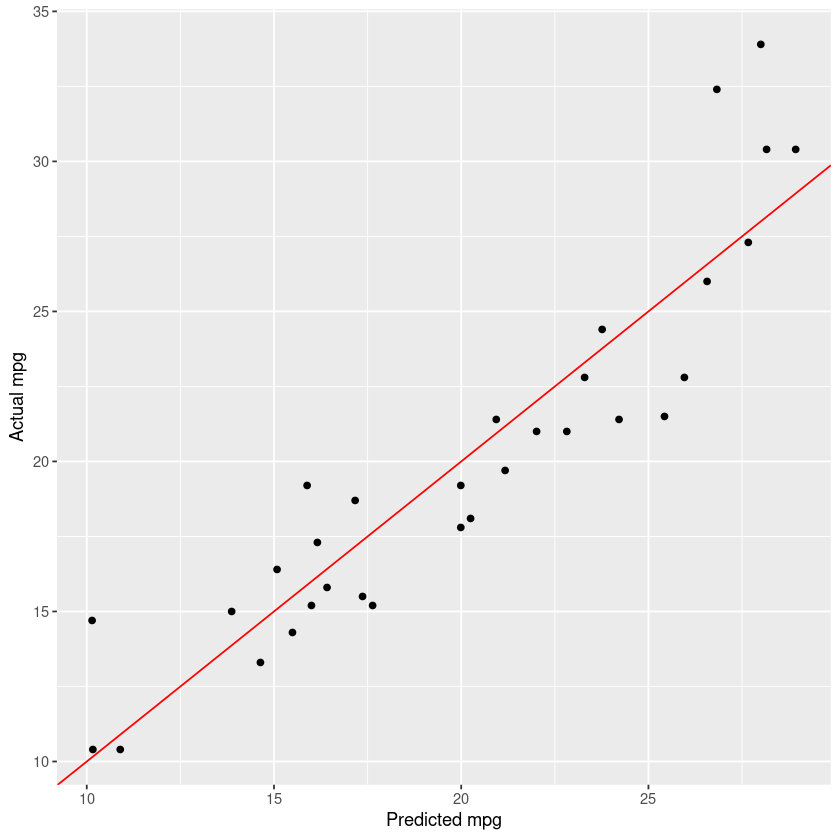

In [7]:
mtcars.adj$pred <- fitted(fm)

ggplot(mtcars.adj) +
    geom_point(aes(x=pred, y=mpg)) +
    geom_abline(color="red") +
    labs(x="Predicted mpg", y="Actual mpg")

The plot of actual vs predicted mpg shows that a linear model is appropriate for this data, with the possible exception of cars that have very high fuel efficiency. We can compute the residual standard error (independently) by using R like a calculator.

In [6]:
n <- nrow(mtcars)
k <- 4
y <- mtcars.adj$mpg
y.hat <- mtcars.adj$pred

sqrt( sum((y - y.hat)^2) / (n-k) )

[1] 2.511548

### Exercise: Linear regression with numeric and categorical predictors.

For the plot, we put the data into "long" format so that it's easier to use ggplot2.

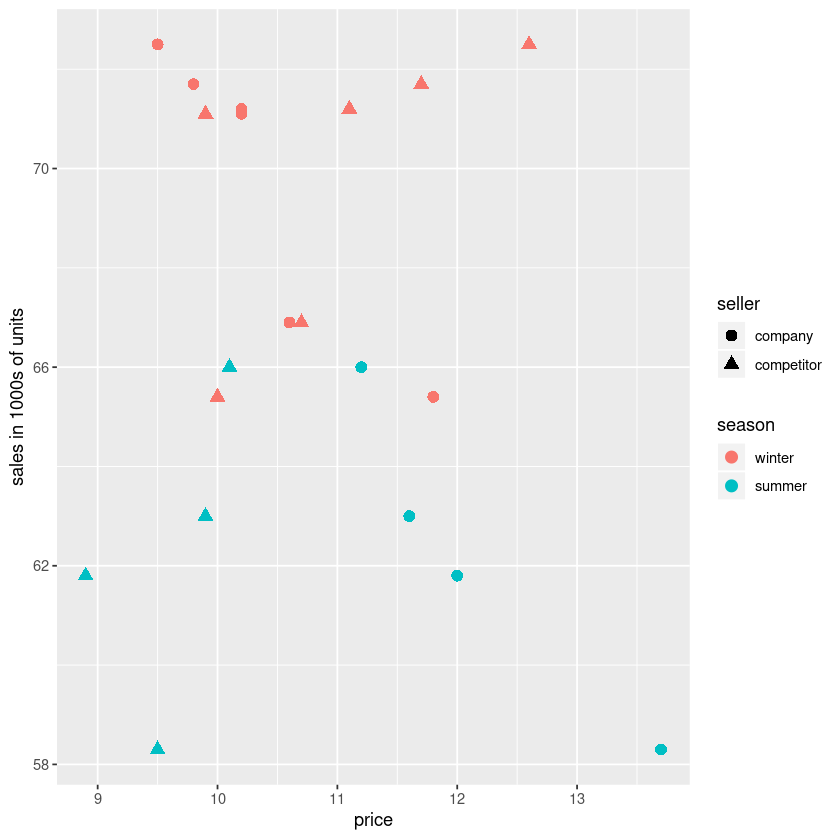

In [2]:
Sales <- read.csv("../data/sales.csv")
Sales$season <- factor(Sales$season, levels=c(0,1),
                   labels=c("winter","summer"))

## put the data in long format for ggplot2
price <- with(Sales, c(company.price, competitor.price))
sales <- with(Sales, rep(sales, 2))
seller <- factor(rep(c("company","competitor"), each=10))
season <- with(Sales, rep(season, 2))
Sales2 <- data.frame(price=price, sales=sales, seller=seller, season=season)

ggplot(Sales2) +
    geom_point(aes(x=price, y=sales, shape=seller, color=season), size=3) +
    labs(y="sales in 1000s of units")

The relationships among the variables are now easy to see. Sales for this item are higher in winter than in summer, regardless of price. We can also see that as the company's price increases, sales decrease. As the competitors price increases, the company's sales increase. Noticing these relationships serves as a check on the output from the regression model. We what to expect for the signs on the coefficients.

In [3]:
fm <- lm(sales ~ company.price + competitor.price + season, data=Sales)
summary(fm)
coef(fm)


Call:
lm(formula = sales ~ company.price + competitor.price + season, 
    data = Sales)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.10593 -0.55162  0.09827  0.84919  1.08960 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)       97.8067    11.2889   8.664  0.00013 ***
company.price     -2.9269     0.5778  -5.066  0.00230 ** 
competitor.price   0.2078     0.6079   0.342  0.74407    
seasonsummer      -2.0388     1.1770  -1.732  0.13395    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.229 on 6 degrees of freedom
Multiple R-squared:  0.9566,	Adjusted R-squared:  0.9349 
F-statistic: 44.08 on 3 and 6 DF,  p-value: 0.0001759


(Intercept)    company.price competitor.price     seasonsummer 
      97.8067339       -2.9268642        0.2078464       -2.0388312


$\beta_0$ is the average company sales at a company price of zero dollars
and a competitor price of zero dollars for the winter season.

$\beta_1$ is the effect on sales of a one dollar increase in the company
price, holding competitor price and season constant. So, for every one dollar
increase in company price, sales decrease by about 2,927 units.

$\beta_2$ is the effect on sales of a one dollar increase in competitor
price. For each one dollar increase in competitor price, sales increase
by about 208 units, holding company price and season constant.

$\beta_3$ is the effect on sales of going from the winter season
to the summer season, holding prices constant. On average, the company
sells about 2039 less units during summer.

Competitor price should not be included in the model because
the $p$-value is large, meaning that competitor price has little or no
effect on company sales.

If both companies charge \$11 during the winter season, expected sales are

$\beta_0 + \beta_111 + \beta_211 \approx 68$

or about 68,000 units.